<a href="https://colab.research.google.com/github/AmtulYasmeen/Projects-Done/blob/Pytorch/styleTransfer_GANS_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# style transfer
'''
output of conv layer is feature map which containg structural and content info
as well as style info
using conv layer of pretrained model
content image : extract content or structure info
style image : extract style info
target image : img is trained during training process of this model

obj of training process in nst algo is to min the content loss of
the target img with the content img and style loss of the target img with style img

features maps and gram matrices are used for this'''

In [ ]:
'''neural style transfer refers to algo that manipulate imgs 
to adopt the apperance of another img
ie process of taking an img and reproducing it with a new artistic style
using a pre-trained nn

In [ ]:
'''
we pass in the 3 imgs into the pretrained nn as input
content img 
style img
target img

output we get a trained target img with style from style img and content from content img


In [ ]:
# in style transfer we dont train the neural network model weights
# pretrained model weights are frozen
# instead we train the weights of the target image
# so that it picks up the content and style from content and style img

In [ ]:
# training process of nst involves 2 types of losses
# content loss and style loss
# we minimize the content loss with content img
# and  minimize the style loss with style img

# this helps in the style transfer algo to pick up style and content

# minimizing content loss
# 1. target img is initialized as random noise img
# 2. during training we min the content loss of target img with content img

# minimizing style loss
# 1. target img is initialized as random noise img
# 2. during training we min the style loss of target img with style img

# training
# using pretrained model, but model weights remains unchanged during training process
# only target img is what is modified during training
# the pixel value or weights of target img is trained

# nst uses back prop not for training the model but to modify the 
# target image , not the model which remains unchanged

content img    style img        target img(random noise img)
   |                |                       |
------------pretrained vgg network model---------------------------
   |                |                |            |
content         style rep         style rep   content rep
representation       |-----------------|               |
|                       style loss
|
|
-------------------------------------------------------|-
                      content loss



# vggnet generate the feature maps of content img, style img 
# and also extract style and content representations from target img

# calc mean square error or distance btw the 
# content representation of target img and content img respectively as content loss
# and style rep of target img and style img respectively as style loss

# we train the weights of target img st content loss and style loss is minimized

# to get feature maps for content and style
# we designate specific layers of cnn as content layer of interest 
# typically the earlier layers 
# and style layers of interest
# there are several layers to extract style info
# mostly intermediate layers
# and final layers are not used at all


# extracting content from content img
# content layers of interest, earlier layers
# conv layers : local receptive field
# kernel weights are used to extract struct and fearues in the img
# by generating feature maps, captures spatial info and struc info
# pixels -- lines -- edges -- objects

# content loss = diff btw feature maps of target img and content imgg
# mse loss

#extracting style info
# concept to understand style info extraction
# --cosine similarity:
# its a measure of similarity btw two non-zero vectors, widely used in ml
# expresses alignment btw two vectors
# cosine of angle btw 2 vectors tell us how similar thy are
# --orthogonal vectors:
# vectors at 90 degrees to each other and are not correlated to each other
# they r unrelated and independent from one another
# -- cosine similarity is the cosine of the angle btw these two vector
# ie cosine of 90 degrees = 0

# aligned or parallel vectors
# angle btw them is 0 degrees 
# cosine of 0 degrees = 1
# these two vectors are positively correlated and dependent on each other

# opposite vectors
# angle btw them is 180 degrees
# cosine of 180 degrees is -1
# these two vectors are negatively correlated 
'''
mathematical formula for cosine similarity

cos(theta) = <AB> / ||A|| * ||B||

magnitude of vect A and B
||A|| = sqrt(XA2 + YA2 + ZA2)
||B|| = sqrt( \XB2 +YB2 + ZB2)
dot product of A, B -->  <A,B> = XA*XB + YA*YB + ZA*ZB

dot product is the measure of how similar two vectors are
smaller the dot product less similar the two vectors

the feature maps from conv layers gives us content and style info
To access the style info without the content info 
we flattening the feature maps
this flattening will preserve the style and lose the structure

H, W , C  3d feature map ----> HxW, C  2d vector

now calc the dot product of this flatten matrix with its transpose
this show us how features co-occur in input img
F . FTranspose = gram matrix

gram matrix is the dot product of flatten feature map representation with its transpose
this gram matrix contains the feature info
cooccurance of features gives us style info 

style loss =  diff btw gram matrix representation of target img and style img

these gram matrix rep is generated only from style layers of interest

we use mse as loss


# feature extraction using conv kernel

In [35]:
# understanding conv filters
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [85]:
img = Image.open('sample_img.jpg').convert('RGB')

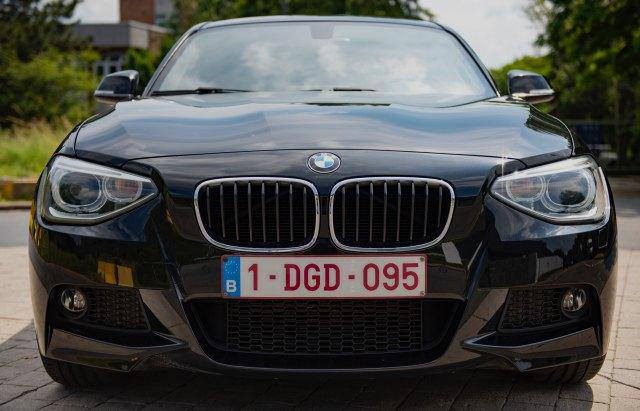

In [38]:
img

In [69]:
import torch
import torch.nn.functional as F
from torchvision import transforms as tf

In [86]:
transforms = tf.Compose([tf.Resize(256),
                        tf.ToTensor()])

In [87]:
img_tensor = transforms(img)

In [88]:
img_tensor

tensor([[[0.0627, 0.1412, 0.2784,  ..., 0.0745, 0.0667, 0.0471],
         [0.1333, 0.1922, 0.3294,  ..., 0.0667, 0.0588, 0.0392],
         [0.1922, 0.1922, 0.2314,  ..., 0.0667, 0.0627, 0.0471],
         ...,
         [0.3882, 0.4039, 0.4118,  ..., 0.7020, 0.6314, 0.6353],
         [0.3765, 0.3765, 0.3843,  ..., 0.6941, 0.6706, 0.6902],
         [0.3412, 0.3529, 0.3765,  ..., 0.6941, 0.6824, 0.6902]],

        [[0.1098, 0.1843, 0.3216,  ..., 0.0824, 0.0784, 0.0588],
         [0.1686, 0.2275, 0.3647,  ..., 0.0745, 0.0706, 0.0510],
         [0.2157, 0.2157, 0.2549,  ..., 0.0745, 0.0706, 0.0549],
         ...,
         [0.3725, 0.3882, 0.3961,  ..., 0.6353, 0.5647, 0.5686],
         [0.3608, 0.3608, 0.3686,  ..., 0.6275, 0.6039, 0.6235],
         [0.3255, 0.3373, 0.3608,  ..., 0.6275, 0.6157, 0.6235]],

        [[0.1804, 0.2471, 0.3725,  ..., 0.0275, 0.0157, 0.0000],
         [0.2314, 0.2863, 0.4118,  ..., 0.0275, 0.0157, 0.0000],
         [0.2627, 0.2549, 0.2784,  ..., 0.0353, 0.0314, 0.

In [89]:
img_tensor.shape

torch.Size([3, 256, 398])

In [90]:
# input imgs pass into pytorch have 4 dims
# therefore add additional dimension 
img_tensor = img_tensor.unsqueeze(0) #dim is added at axis 0

In [91]:
img_tensor.shape

torch.Size([1, 3, 256, 398])

In [106]:
# conv kernel with pretrained weights used in image processing
# 4 dim matrix : no of output channels, o of input channels, height, weidth

sharpen_kernel = [[[[0,-1,0]],[[-1,5,-1]],[[0,-1,0]]]]

horizontal_line_kernel = [[[[1,0,-1]],[[0,0,0]],[[-1,0,1]]]]

vertical_line_kernel = [[[[0,1,0]],[[1,-4,1]],[[0,1,0]]]]

edge_detection_kernel = [[[[-1,-1,-1]],[[-1,0,-1]],[[-1,-1,-1]]]]


In [101]:
# 1 convert kernels into tensor rep
def pick_filter(filter):
  conv_filter = torch.Tensor(filter)
  print(conv_filter.shape)
  return conv_filter

# 1, it outputs a single chanel feature map 
# 3, input channels 3 as rgb
# 1, height of kernel
# 3, width of kernel



In [107]:
def apply_filter(img, filter):
  conv_img = F.conv2d(img_tensor, filter, padding=0)
  # size of the img is smaller coz of 0 padding
  conv_img.shape

  # to view this conv result get rid of additional batch dim
  conv_img = conv_img[0,:,:,:]
  conv_img.shape

  # its a single channel output coz of the conv result we specified

  # squeeze out the extra dim of size 1 at axis 0
  conv_img = conv_img.numpy().squeeze()
  conv_img.shape

  # 1 sharpen kernel feature map of input img
  plt.imshow(conv_img)


torch.Size([1, 3, 1, 3])


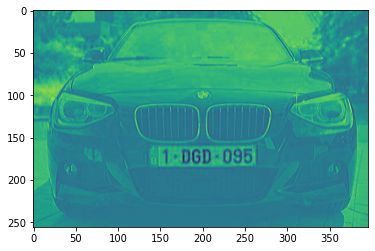

In [109]:
# 1 sharpen_kernel
filter = pick_filter(sharpen_kernel)
apply_filter(img_tensor, filter)

torch.Size([1, 3, 1, 3])


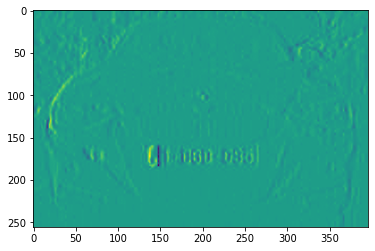

In [110]:
# 2 horizontal_line_kernel
filter = pick_filter(horizontal_line_kernel)
apply_filter(img_tensor, filter)

torch.Size([1, 3, 1, 3])


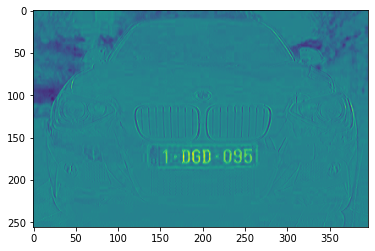

In [111]:
# vertical_line_kernel
filter = pick_filter(vertical_line_kernel)
apply_filter(img_tensor, filter)

torch.Size([1, 3, 1, 3])


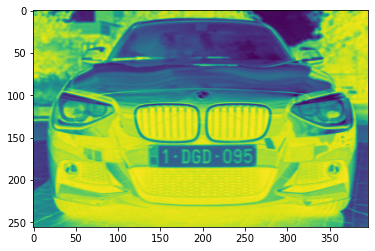

In [112]:
# edge_detection_kernel
filter = pick_filter(edge_detection_kernel)
# print(filter)
apply_filter(img_tensor, filter)

In [ ]:

# in all the above feature maps reps the structural info is captured and
# the texture info is lost

# Implementing neural style transfer in pytorch

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torchvision import models
from torchvision import transforms as tf
import torch.nn.functional as F

In [ ]:
# vgg19: used small kernels stacked together without pooling layer
# 3 3x3 kernel were used instead of 1 7x7 kernel
# smaller kernels inprove representational power of cnn without adding too many parameters
# smaller kernels provide regularization of model without overfitting

# alexnet
# stacking conv layers directly on top of each other
# didnt place pooling layers btw stacked layers
# mitigate overfitting using 50% dropout rate
# also uses random shifting training images by offsets
# local response normalization: strongly activated neurons inhibit nearby neurons
# causes neurons to compete to specialise in diff types of featues

# freeze weights of pretrained model
# train target image weights
# find content loss and style loss
# scale both losses to be in same range as thy r diff in scale


#perform style transfer using VGG19 pretrained model

In [2]:
vgg = models.vgg19(pretrained=True).features

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [3]:
for param in vgg.parameters():
  param.requires_grad_(False)

In [4]:
device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
# every layer of the model is identified using a unique index, 
# which starts at 0

# all the pretrained models in pytorch expects input image pixels to be in
# [0,1] range, normalised using mean and std as below
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)


In [ ]:
'''Define a method to convert tensors to images
Clone the tensor
Convert the tensor to a numpy array and squeeze it to make it 3d
Transpose performs CHW -> HWC
Normalize the image and clip the floats into the valid range for plotting'''

In [6]:
# input content and style img need to be transfored to a format that
# will work with our pretrained model

def transformation(img):
  tasks = tf.Compose([tf.Resize(256),
                      tf.ToTensor(),
                      tf.Normalize(mean, std)])
  img = tasks(img)
  # add in additional batch dim
  img = img.unsqueeze(0)
  return img

In [9]:
# load img
content_img = Image.open('cat.jpg').convert('RGB')
style_img = Image.open('starry_night.jpg').convert('RGB')

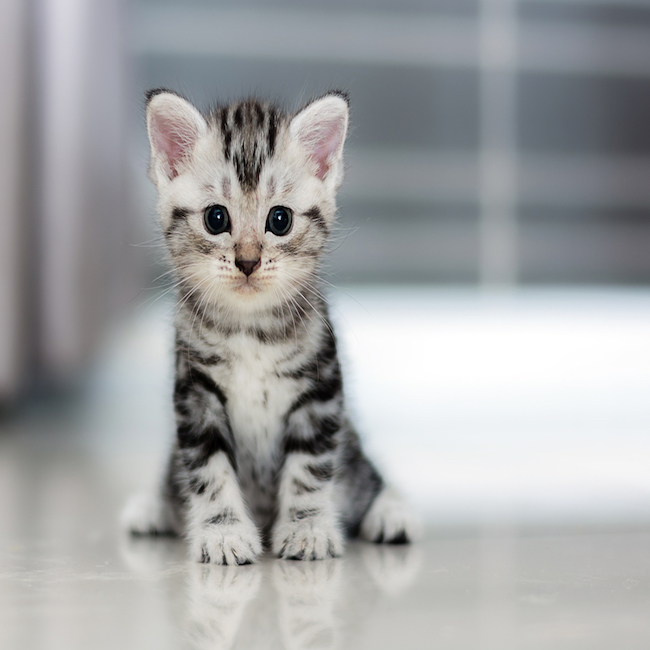

In [10]:
content_img

In [ ]:
list(content_img.getdata())

In [ ]:
style_img

In [125]:
style_img.size

(1500, 1200)

In [11]:
content_img = transformation(content_img).to(device)
style_img = transformation(style_img).to(device)

In [12]:
content_img.shape

torch.Size([1, 3, 256, 256])

In [13]:
style_img.shape

torch.Size([1, 3, 256, 320])

In [14]:
# tensor to img to display using matplotlib

def tensor_to_image(tensor):
  # detach tensor from comp graph and convert into numpy format
  image = tensor.clone().detach()

  # squeeze or remove batch dim
  image = image.cpu().numpy().squeeze()

  # c, h, w ---> h, w, c
  image = image.transpose(1,2,0)

  # multiple pixl values with std and add mean to denormalise img
  image *= np.array(std) + np.array(mean)
  # clip values btw 0 and 1
  image = image.clip(0,1)

  return image


In [15]:
def show(img):
  img = tensor_to_image(img)
  fig = plt.figure()
  fig.suptitle('image')
  plt.imshow(img)

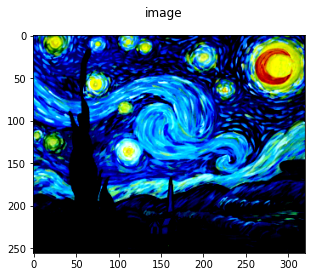

In [16]:
show(style_img)

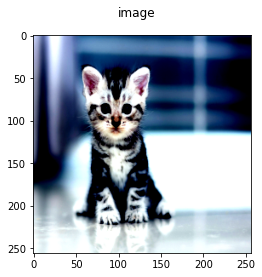

In [17]:
show(content_img)

In [18]:
# specify layers of interest : all are conv layer only
LAYERS_OF_INTEREST = {'0' : 'conv1_1',
                      '5' : 'conv2_1',
                      '10' : 'conv3_1',
                      '19' : 'conv4_1',
                      '21' : 'conv4_2',
                      '28' : 'conv5_1'}
# earlier layers have more content info therefore given more weight than later layers


In [19]:
# helper func to apply layers of vgg19 to input img and extract specific features

def apply_model_and_extract_features(image, model):

  x = image
  # dict to store all the feature maps reps, output from layers of interest
  features = {}
  # applying vgg model to the input layer by layer
  # for every layer in vgg model pass the input x and 
  # store the resulting feature map in x variable

  for name, layer in model._modules.items():
    x = layer(x)
    # chking if currently layer is layer of interest,
    # if so store the feature map of it in the dict
    if name in LAYERS_OF_INTEREST:
      features[LAYERS_OF_INTEREST[name]] = x
  return features

In [20]:
# pass both images through vgg model
content_img_features = apply_model_and_extract_features(content_img,vgg)
style_img_features = apply_model_and_extract_features(style_img,vgg)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
content_img_features

In [ ]:
style_img_features

In [23]:
# to extract style info from style img we need gram matrix of feature maps 
def calculate_gram_matrix(tensor):
  # tensor rep of feature map contains 4 dim
  # batch, channel, height , width extract these to seperate vars
  _, channels, height, width = tensor.size()

  # flatten the feature map rep 
  # tensor.view operation gives us 1d vector for feature maps for each channel
  tensor = tensor.view(channels, height* width)

  # calc dot product for all 1d feature vectors with itself
  gram_matrix = torch.mm(tensor, tensor.t())

  # normalise every gram matrix by dividing gram matrix with num of elements 
  gram_matrix = gram_matrix.div(channels *height*width)

  # initial feature maps are large and tend to get smaller as input passes through the layers of cnn
  # normalising is imp as the large feature maps donot dispropostionaly effect the result
  return gram_matrix

In [31]:
# computing gram matrix rep for all the features maps of layers of interest 
# and store it in dict
style_features_gram_matrix = {layer : calculate_gram_matrix(style_img_features[layer]) for layer in style_img_features}


In [32]:
style_features_gram_matrix 

{'conv1_1': tensor([[1.2129e-03, 1.0880e-03, 8.0375e-05,  ..., 3.0239e-03, 4.5621e-04,
          1.5102e-03],
         [1.0880e-03, 1.5716e-02, 6.8127e-05,  ..., 1.5031e-02, 2.6219e-03,
          6.0778e-03],
         [8.0375e-05, 6.8127e-05, 1.2540e-04,  ..., 4.1115e-06, 6.5670e-05,
          1.6760e-04],
         ...,
         [3.0239e-03, 1.5031e-02, 4.1115e-06,  ..., 6.2786e-02, 9.8608e-03,
          1.3948e-02],
         [4.5621e-04, 2.6219e-03, 6.5670e-05,  ..., 9.8608e-03, 4.0372e-03,
          2.2530e-03],
         [1.5102e-03, 6.0778e-03, 1.6760e-04,  ..., 1.3948e-02, 2.2530e-03,
          1.1564e-02]], device='cuda:0'),
 'conv2_1': tensor([[0.0324, 0.0070, 0.0156,  ..., 0.0287, 0.0033, 0.0075],
         [0.0070, 0.0402, 0.0095,  ..., 0.0496, 0.0092, 0.0092],
         [0.0156, 0.0095, 0.0290,  ..., 0.0305, 0.0023, 0.0053],
         ...,
         [0.0287, 0.0496, 0.0305,  ..., 0.2002, 0.0207, 0.0261],
         [0.0033, 0.0092, 0.0023,  ..., 0.0207, 0.0231, 0.0102],
         [0.

In [26]:
# we will extract feature map info from output of no of conv layers
# weights dict assigns the weights to each feature map output based on position 

weights = {'conv1_1': 1.0, 'conv2_1': 0.75, 'conv3_1': 0.35,
           'conv4_1': 0.25, 'conv5_1': 0.15}
# conv4_2 : we extract content info 

In [27]:
# target img is trained to minimize content distance from content img and style distance from style image
# the target img can be initialised with random weights
# here we have initialised it with the content img itself
target = content_img.clone().requires_grad_(True).to(device)

optimizer = optim.Adam([target], lr=0.03)


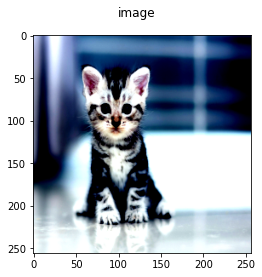

In [28]:
show(target)

In [34]:
for i in range(1, 200):
  # to get target feature maps dict for all layers of interest
  target_features = apply_model_and_extract_features(target, vgg)
  # to minimise content distance of target img from content img
  # extract the content info frm early layer conv4_2
  content_loss = F.mse_loss(target_features['conv4_2'], content_img_features['conv4_2'])
  
  style_loss = 0
  
  for layer in weights:
    target_feature = target_features[layer]
    target_gram_matrix = calculate_gram_matrix(target_feature)
    style_gram_matix = style_features_gram_matrix[layer]

    layer_loss = F.mse_loss(target_gram_matrix, style_gram_matix )
    layer_loss *= weights[layer]
    style_loss += layer_loss
  # scale of content loss and style loss is v diff
  # 
  total_loss = 100000 * style_loss + content_loss

  if i % 50 == 0:
        print ('Epoch {}:, Style Loss : {:4f}, Content Loss : {:4f}'.format( i, style_loss, content_loss))
    
  optimizer.zero_grad()
    
  total_loss.backward()
    
  optimizer.step()

Epoch 50:, Style Loss : 0.000033, Content Loss : 1.033513
Epoch 100:, Style Loss : 0.000021, Content Loss : 0.872871
Epoch 150:, Style Loss : 0.000016, Content Loss : 0.819216


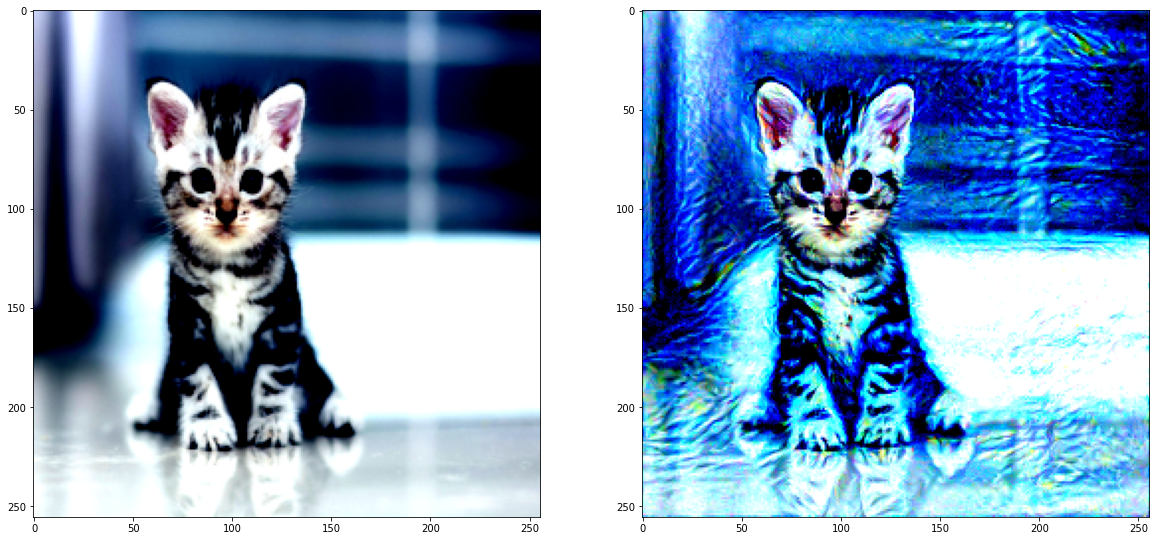

In [35]:
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(tensor_to_image(content_img))
ax2.imshow(tensor_to_image(target))

#GANS

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image

In [ ]:
'''Load Data
Define constants
Load mnist and apply transforms
Define dataloader '''

'Load Data\nDefine constants\nLoad mnist and apply transforms\nDefine dataloader '

In [ ]:
batch_size = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))])

In [ ]:
mnist = torchvision.datasets.MNIST(root='datasets/',
                                   train=True,
                                   transform=transform,
                                   download=True)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist,
                                          batch_size=batch_size, 
                                          shuffle=True)

In [ ]:
# vizualise data

In [ ]:
images, labels = iter(data_loader).next()

In [ ]:
images

In [ ]:
labels

tensor([7, 2, 8, 6, 1, 8, 0, 0, 3, 9, 1, 4, 2, 2, 9, 3, 4, 9, 1, 4, 0, 5, 5, 2,
        1, 2, 5, 5, 9, 1, 3, 6, 2, 8, 4, 8, 0, 2, 1, 4, 7, 5, 7, 2, 6, 5, 2, 9,
        3, 4, 2, 4, 9, 1, 2, 4, 0, 3, 3, 4, 3, 9, 7, 5, 7, 3, 7, 7, 5, 0, 3, 9,
        8, 4, 3, 0, 7, 1, 3, 0, 3, 7, 7, 4, 6, 6, 3, 8, 2, 8, 4, 8, 0, 7, 9, 7,
        4, 7, 7, 6])

In [ ]:
img = torchvision.utils.make_grid(images)

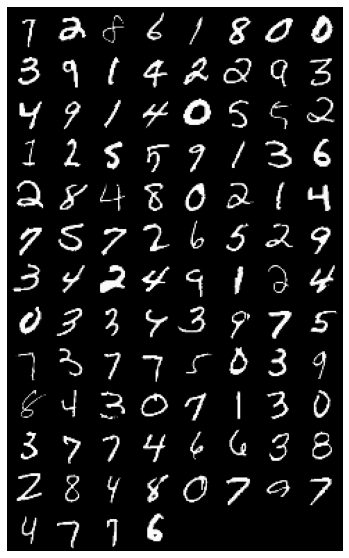

In [ ]:
img = img.detach().numpy()
img = img.clip(0,1)
plt.figure(figsize=(12,10))
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [ ]:
'''Define Neural Networks
Define Hyper-parameters
Define the Discriminator
Define the Generator'''

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 100

In [ ]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [ ]:
D = D.to(device)
G = G.to(device)

In [ ]:
# training

In [ ]:
bce_loss = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [ ]:
total_step = len(data_loader)

In [ ]:
for epoch in range(num_epochs):
    
    for i, (images, _) in enumerate(data_loader):
        
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        
        outputs = D(images)

        # Second term of the loss is always zero since real_labels == 1
        # This is what causes it to minimize the loss for real images
        d_loss_real = bce_loss(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        
        outputs = D(fake_images)

        # First term of the loss is always zero since fake_labels == 0
        # This is what causes it to maximize the loss for fake images
        d_loss_fake = bce_loss(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        
        g_loss = bce_loss(outputs, real_labels)
        
        # Backprop and optimize
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()

        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)

In [ ]:
for epoch in range(num_epochs):
  for i, (images, _) in enumerate(data_loader):
    images = images.reshape(batch_size, -1).to(device)

    # create labels which are later used as input for bce loss

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # train the discriminator

    # compute bce_loss using real images where bce_loss(x,y): 
    # -y * log(D(x))
    outputs = D(images)

    # second term of loss is always zero since real_labels == 1
    # this is what causes it to minimizw the loss for real images

    d_loss_real = bce_loss(outputs, real_labels)
    real_score = outputs


    # compute bceloss using fake images

    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)

    # first tern of loss is always zero since fake labels == 0
    # this is what causes it to maximize the loss for fake images

    d_loss_fake = bce_loss(outputs, fake_labels)
    fake_score = outputs

    # backprop and optimize
    d_loss = d_loss_real + d_loss_fake

    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    # train generator

    # compute loss with fake images

    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)

    # we train G to maximize log(D(G(z))) instead of miniizing
    # log(1-D(G(z))) 
    
    g_loss = bce_loss(outputs, real_labels)

    # backprob and optim
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

    g_loss.backward()
    g_optimizer.step()
    if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)

Epoch [0/100], Step [200/600], d_loss: 0.0727, g_loss: 4.4554, D(x): 0.98, D(G(z)): 0.04
Epoch [0/100], Step [400/600], d_loss: 0.6574, g_loss: 1.7775, D(x): 0.78, D(G(z)): 0.30
Epoch [0/100], Step [600/600], d_loss: 0.1873, g_loss: 4.3855, D(x): 0.91, D(G(z)): 0.07
Epoch [1/100], Step [200/600], d_loss: 0.9288, g_loss: 1.5204, D(x): 0.78, D(G(z)): 0.37
Epoch [1/100], Step [400/600], d_loss: 1.0439, g_loss: 1.7494, D(x): 0.78, D(G(z)): 0.45
Epoch [1/100], Step [600/600], d_loss: 0.8802, g_loss: 1.8614, D(x): 0.74, D(G(z)): 0.32
Epoch [2/100], Step [200/600], d_loss: 0.9424, g_loss: 1.4210, D(x): 0.73, D(G(z)): 0.32
Epoch [2/100], Step [400/600], d_loss: 0.6865, g_loss: 1.5794, D(x): 0.85, D(G(z)): 0.32
Epoch [2/100], Step [600/600], d_loss: 0.3947, g_loss: 2.8879, D(x): 0.89, D(G(z)): 0.17
Epoch [3/100], Step [200/600], d_loss: 0.3112, g_loss: 3.0842, D(x): 0.91, D(G(z)): 0.08
Epoch [3/100], Step [400/600], d_loss: 0.4503, g_loss: 2.6656, D(x): 0.93, D(G(z)): 0.23
Epoch [3/100], Step [

In [ ]:
img = torchvision.utils.make_grid(fake_images)

In [ ]:
img = img.detach().cpu().numpy()
img = img.clip(0,1)

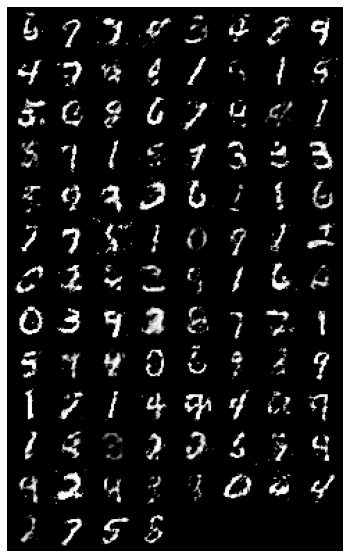

In [ ]:
plt.figure(figsize = (12, 10))
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('off')
plt.show()